In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio

def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  #  normalization
    plt.imshow(cm, interpolation='nearest')  # Displays an image on a specific window
    plt.title(title)  # Figure title
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))
    plt.xticks(num_local, labels_name, rotation=90)  # Print the label on the X-axis
    plt.yticks(num_local, labels_name)  # Print the label on the Y-axis
    plt.ylabel('True label')
    plt.xlabel('Predicted label')   


In [74]:
# Importing the datasets

data = sio.loadmat('3s_scene_python/train_data.mat')
X_Train = data['train_data']
data = sio.loadmat('3s_scene_python/train_label.mat')
Y_Train0 = data['train_label']
Y_Train = Y_Train0.squeeze()

data = sio.loadmat('3s_scene_python/test_data.mat')
X_Test = data['test_data']
data = sio.loadmat('3s_scene_python/test_label.mat')
Y_Test0 = data['test_label']
Y_Test = Y_Test0.squeeze()


In [75]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)


In [76]:
# Fitting the classifier into the Training set

from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_Train, Y_Train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [77]:
# Predicting the test set results

Y_Pred = classifier.predict(X_Test)


In [78]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_Test, Y_Pred)


array([[ 6,  0,  0,  0,  0,  0,  0,  0,  6],
       [ 6,  0,  6,  0,  0,  0,  0,  0,  0],
       [ 6,  6,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  6,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  6,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0, 12,  0],
       [ 0,  0,  0,  0,  0,  0,  6, 12,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  6]], dtype=int64)

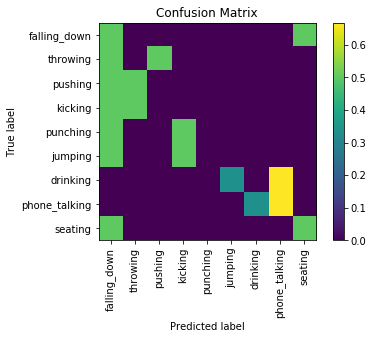

In [79]:
# Show the confusion matrix 

cm = confusion_matrix(Y_Test, Y_Pred)
labels_name = ["falling_down", "throwing", "pushing", "kicking", "punching", "jumping", "drinking", "phone_talking",
               "seating"]
plot_confusion_matrix(cm, labels_name, "Confusion Matrix")
plt.show()


In [80]:
# Print classification report

from sklearn.metrics import classification_report

print (classification_report(Y_Test,Y_Pred, target_names = labels_name))


               precision    recall  f1-score   support

 falling_down       0.14      0.50      0.22        12
     throwing       0.00      0.00      0.00        12
      pushing       0.00      0.00      0.00        12
      kicking       0.00      0.00      0.00        12
     punching       0.00      0.00      0.00        12
      jumping       0.00      0.00      0.00        12
     drinking       0.00      0.00      0.00        18
phone_talking       0.50      0.67      0.57        18
      seating       0.50      0.50      0.50        12

     accuracy                           0.20       120
    macro avg       0.13      0.19      0.14       120
 weighted avg       0.14      0.20      0.16       120



C:\Users\Yanling\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
